In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/big-mart-sale/clustering.csv


In [2]:
data = pd.read_csv("/kaggle/input/big-mart-sale/clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


For explaining purpose, we will take two variables from data "ApplicantIncome" and "LoanAmount".

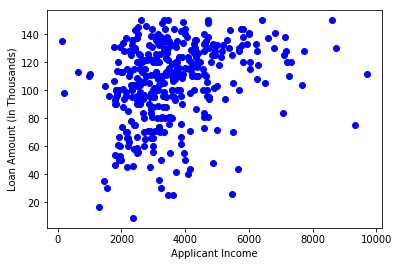

In [3]:
X = data[["ApplicantIncome", "LoanAmount"]]
# Visualize data point
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (In Thousands)")
plt.show()

Steps of K-Means clustering
1. Choose the number of clusters K
2. select K random points from the data as centroid
3. assign each data point to the closet cluster centriod
4. Recompute the centriod of newly formed cluster, next step is to compute the centriod of newly formed clusters
5. repeat steps 3 and 4

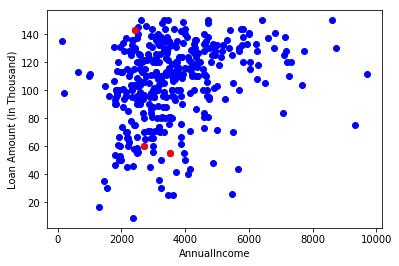

In [4]:
# step 1 and 2

# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

In [5]:
Centroids

,ApplicantIncome,LoanAmount
277,2425,143.0
284,3539,55.0
274,2717,60.0


In [6]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


589.4894185619269
609.8777662744718
417.11902675964245
399.19059297247975
215.94836106251185
212.11585654878053
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


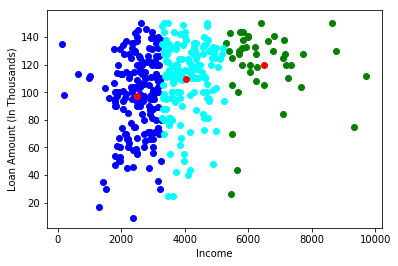

In [7]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()